In [1]:
import Diagrams.Backend.Cairo.CmdLine

This is a transcription in Haskell of "Hex Variation" by William Kolmyjec.
The algorithm itself is inspired by [the version of Steve Berrick](http://recodeproject.com/artwork/v3n4hex-variation), from the
[Recode project](http://recodeproject.com).



In [8]:
{-# LANGUAGE NoMonomorphismRestriction TypeFamilies #-}

import Diagrams.Prelude
import System.Random

We first define the parameters of the tile, which is hexagonal. The side of a
hexagon is the radius of its circumscribed circle, here taken as 1.

The apothem is the distance from the center to the side:



In [5]:
h = sqrt 3 / 2

We define the difference between the radius and the apothem:



In [6]:
h' = cos (pi/3)

We then define a tile. The hexagon is not actually shown but inside are two
arcs, along with a vertical line. To see the tiling, you can add an hexagon in
the list below:



In [9]:
hexagon' :: Diagram B
hexagon' = mconcat [arc1 # translateX (-1)
                  , vrule (2*h)
                  , arc1 # rotateBy (1/2) # translateX 1
                  ]
    where
      arc1 = arc' 0.5 (xDir # rotate (-pi/3 @@ rad)) (2*pi/3 @@ rad)

In the final tiling, the tiles will be rotated randomly with angles in $\{0,
\frac{2 \pi}{3}, \frac{4 \pi}{3} \}$.



In [11]:
rotateHexagon' :: Int -> Diagram B
rotateHexagon' n = hexagon' # rotate (n'*2*pi/3 @@ rad)
  where
    n' = fromIntegral n

The tiling is created from a list of centers, defined here:



In [13]:
centerPosition :: Int -> Int -> (Double, Double)
centerPosition x y
  | x `mod` 2 == 0 = ((2-h')*x', 2*y'*h)
  | otherwise        = ((2-h')*x', (2*y'-1)*h)
  where
    x' = fromIntegral x
    y' = fromIntegral y

The function generating random angles with a fixed seed:



In [14]:
generateAngles :: [Int]
generateAngles = randomRs (0, 2) (mkStdGen 31)

Finally, the tiling is created here:



In [19]:
nb = 12
hexVariation :: Diagram B
hexVariation = position (zip (map p2 pos) (map rotateHexagon' angles))
  where
    pos = [(centerPosition x y) | x <- [0..nb-1], y <- [0..nb-1]]
    angles = take ((nb+1)*(nb+1)) $ generateAngles

Line 5: Redundant bracket
Found:
[(centerPosition x y) | x <- [0 .. nb - 1], y <- [0 .. nb - 1]]
Why not:
[centerPosition x y | x <- [0 .. nb - 1], y <- [0 .. nb - 1]]Line 6: Redundant $
Found:
$
Why not:

The envelope of our tiling is `nb*1.5*side + 0.5*side` in width and `nb*2*h+h` in
height. We remove the "corners" to avoid "holes" at the borders of the figure
and define the new width and height:



In [20]:
width' = nb*1.5 - 0.5
height' = nb*2*h - h

Which are used to "clip" the figure here:



In [21]:
example :: Diagram B
example = hexVariation # center # rectEnvelope x0 u0 # rotateBy (1/4)
  where
    x0 = p2 (-width'/2, -height'/2)
    u0 = r2 (width', height')

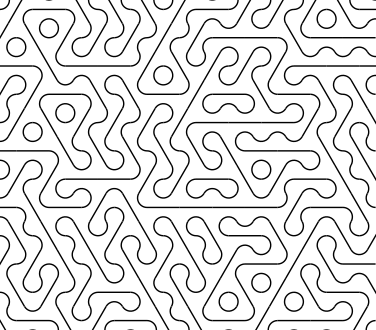

In [22]:
example